In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# load dataset
dataset_path = Path("datasets/amazon/data/test.csv")
df_test = pd.read_csv(dataset_path)

dataset_path = Path("datasets/amazon/data/validation.csv")
df_validation = pd.read_csv(dataset_path)

# concatenate datasets
df = pd.concat([df_test, df_validation], ignore_index=True)

df.head()

,Unnamed: 0,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,0,de_0784695,product_de_0572654,reviewer_de_0645436,1,"Leider, leider nach einmal waschen ausgebliche...",Leider nicht zu empfehlen,de,home
1,1,de_0759207,product_de_0567331,reviewer_de_0183703,1,zunächst macht der Anker Halter einen soliden ...,Gummierung nach 6 Monaten kaputt,de,wireless
2,2,de_0711785,product_de_0482105,reviewer_de_0182152,1,Siegel sowie Verpackung war beschädigt und war...,Flohmarkt ware,de,industrial_supplies
3,3,de_0964430,product_de_0616480,reviewer_de_0991563,1,Habe dieses Produkt NIE erhalten und das Geld ...,Katastrophe,de,industrial_supplies
4,4,de_0474538,product_de_0228702,reviewer_de_0316188,1,Die Träger sind schnell abgerissen,Reißverschluss klemmt,de,luggage


In [3]:
# filter out language
language = "en"
df = df[df["language"] == language]

In [4]:
# list all columsn in the dataframe
print("Columns in the DataFrame:")
for column in df.columns:
    print(column)

Columns in the DataFrame:
Unnamed: 0
review_id
product_id
reviewer_id
stars
review_body
review_title
language
product_category


In [5]:
# remove all columns but review_body review_title product_category stars
df = df[["review_body", "review_title", "product_category", "stars", "language"]]
# remove all rows with NaN values
df = df.dropna()
# remove all rows with empty review_body
df = df[df["review_body"].str.strip() != ""]
# remove all rows with empty review_title
df = df[df["review_title"].str.strip() != ""]
# remove all rows with empty product_category
df = df[df["product_category"].str.strip() != ""]
# remove all rows with empty stars
df = df[df["stars"].notna()]
# remove the language column
df = df.drop(columns=["language"])

In [6]:
# only keep the product categories which are
top_products = ["beauty", "kitchen", "toy", "sports", "shoes", 
                "book", "automotive", "jewelry", "pet_products", 
                "furniture", "pc", "industrial_supplies", 
                "baby_product", "apparel", "grocery"]
df = df[df["product_category"].isin(top_products)]

In [7]:
# merge review_body and review_title into a single text column
df["text"] = df["review_title"] + " " + df["review_body"]
# remove the review_body and review_title columns
df = df.drop(columns=["review_body", "review_title"])

In [8]:
# Print some statistics about the DataFrame

# length of the dataframe
print(f"Number of rows in the DataFrame: {len(df)}")

# number of unique stars
print(f"Number of unique stars: {df['stars'].nunique()}")

# number of unique product categories
print(f"Number of unique product categories: {df['product_category'].nunique()}")

Number of rows in the DataFrame: 5079
Number of unique stars: 5
Number of unique product categories: 15


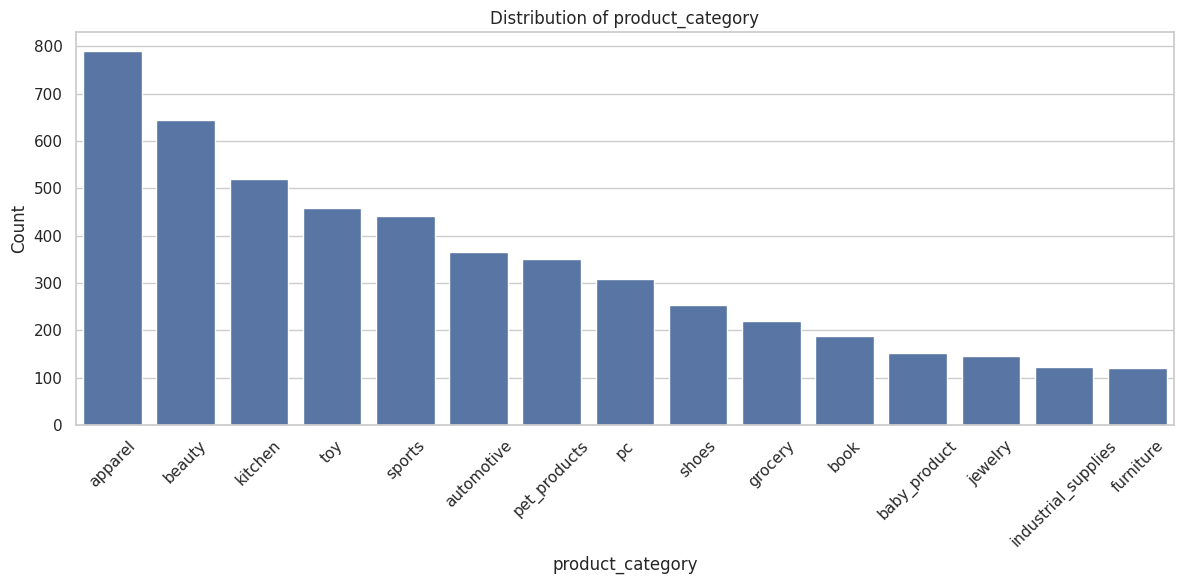

In [9]:
def plot_column_distribution(dataframe, column_name):
    """
    Plots the distribution of a specified column in the DataFrame.
    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.
    """
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    sns.countplot(data=dataframe, x=column_name, order=dataframe[column_name].value_counts().index)
    plt.title(f"Distribution of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_column_distribution(df, "product_category")

In [10]:
def print_column_counts(dataframe, column_name):
    counts = dataframe[column_name].value_counts()
    for value, count in counts.items():
        print(f"{column_name}: {value}, Count: {count}")

print_column_counts(df, "product_category")

product_category: apparel, Count: 790
product_category: beauty, Count: 645
product_category: kitchen, Count: 520
product_category: toy, Count: 458
product_category: sports, Count: 442
product_category: automotive, Count: 365
product_category: pet_products, Count: 350
product_category: pc, Count: 308
product_category: shoes, Count: 253
product_category: grocery, Count: 220
product_category: book, Count: 187
product_category: baby_product, Count: 152
product_category: jewelry, Count: 145
product_category: industrial_supplies, Count: 123
product_category: furniture, Count: 121


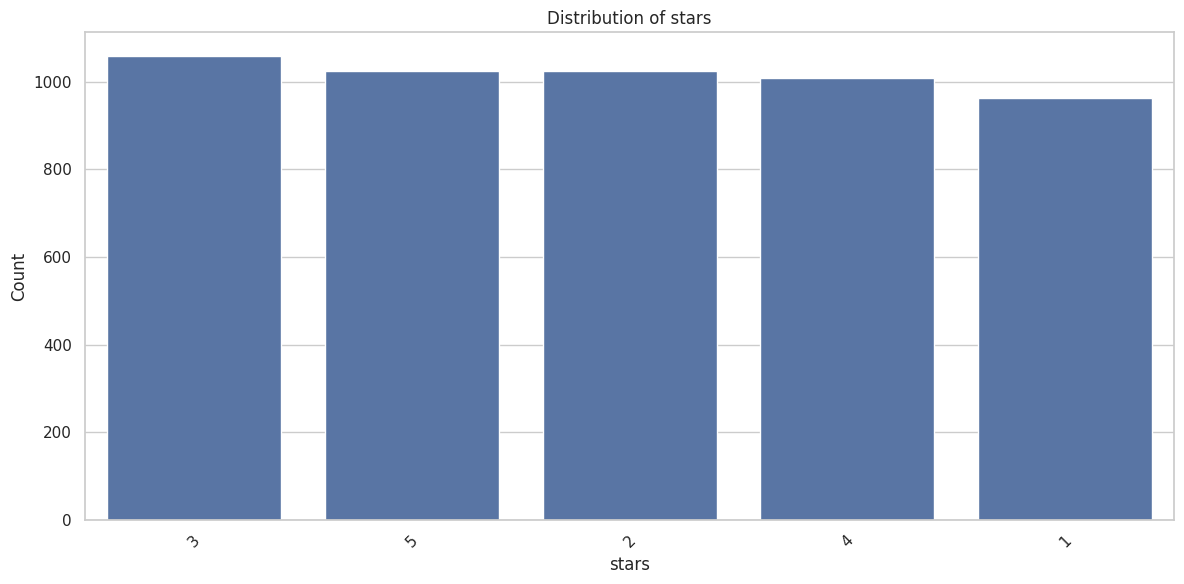

In [11]:
plot_column_distribution(df, "stars")

In [12]:
print_column_counts(df, "stars")

stars: 3, Count: 1060
stars: 5, Count: 1024
stars: 2, Count: 1024
stars: 4, Count: 1008
stars: 1, Count: 963


In [13]:
# Sample the dataframe, so that each star occurs exactly N times
def sample_star(df, star, n):
    star_df = df[df["stars"] == star]
    if len(star_df) < n:
        return star_df
    return star_df.sample(n=n, random_state=42)

sampled_df = pd.concat([sample_star(df, star, n=900) for star in df["stars"].unique()], ignore_index=True)

In [14]:
# Split the sampled dataframe into train and test sets
train_df, test_df = train_test_split(
    sampled_df,
    test_size=5/9,
    random_state=40,
    stratify=sampled_df["stars"]
)

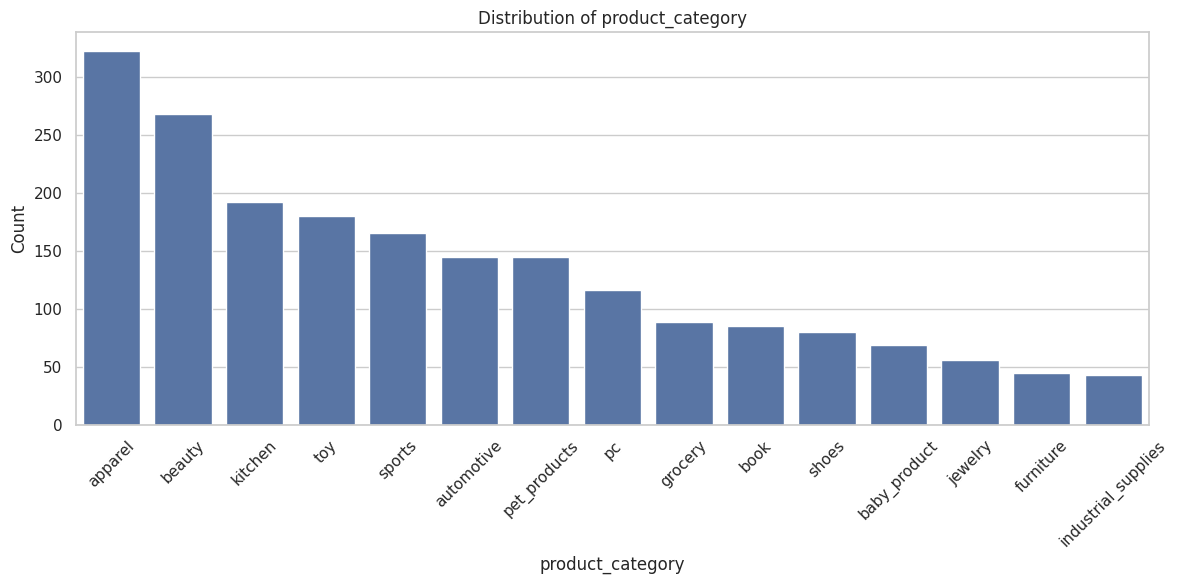

In [15]:
plot_column_distribution(train_df, "product_category")

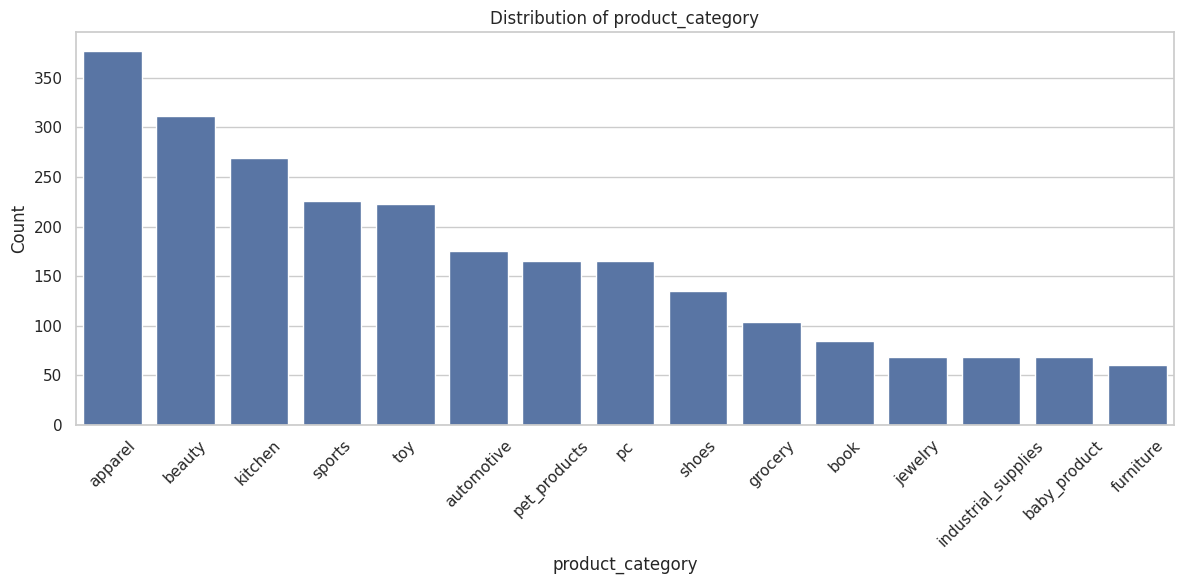

In [16]:
plot_column_distribution(test_df, "product_category")

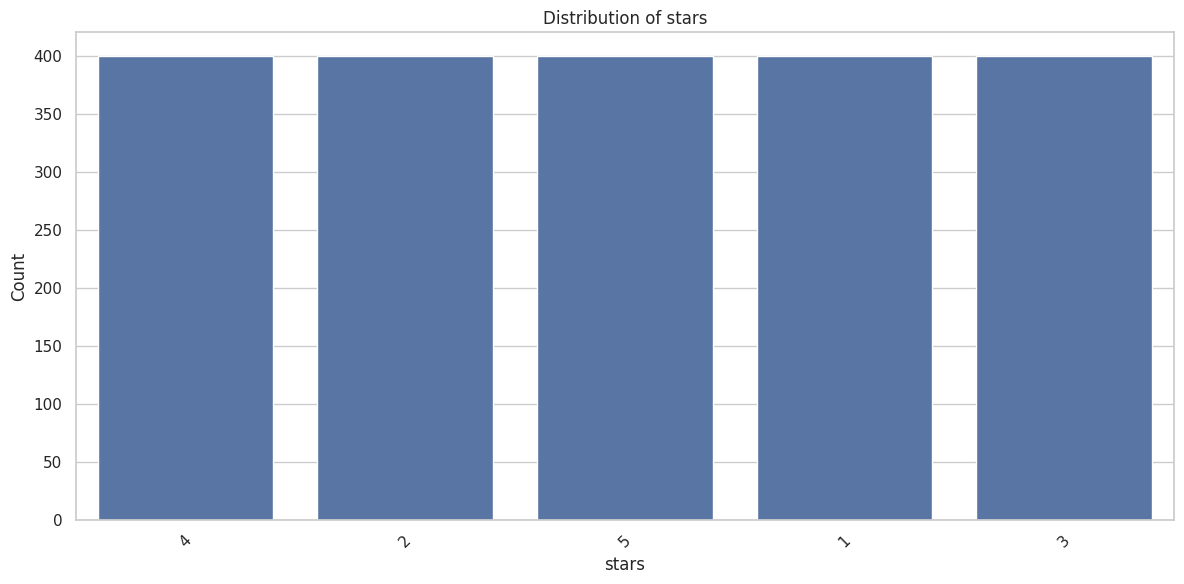

In [17]:
plot_column_distribution(train_df, "stars")

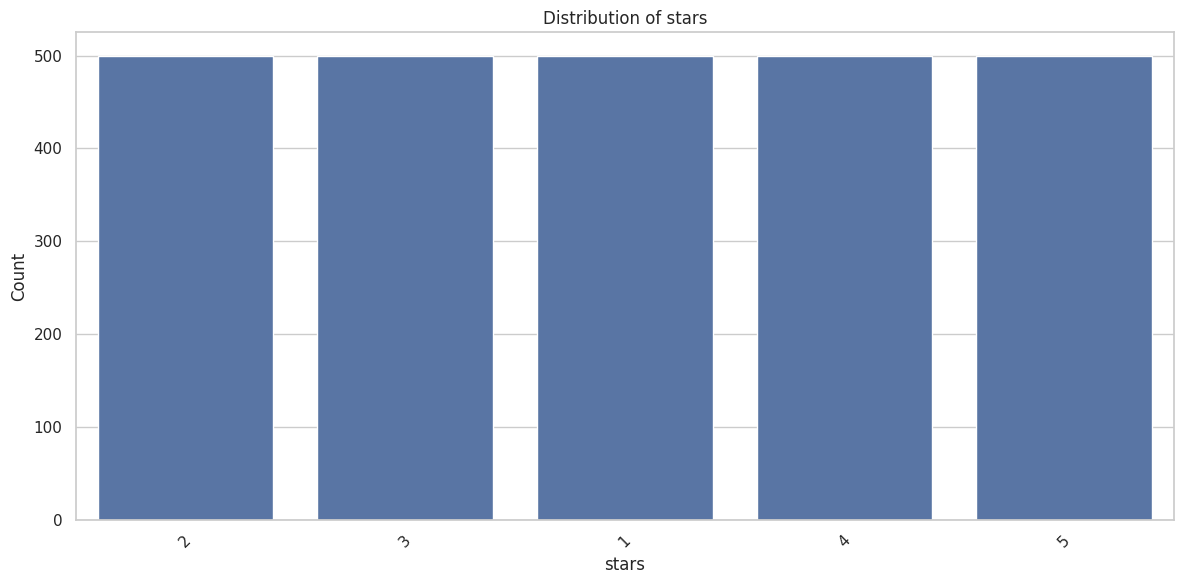

In [18]:
plot_column_distribution(test_df, "stars")

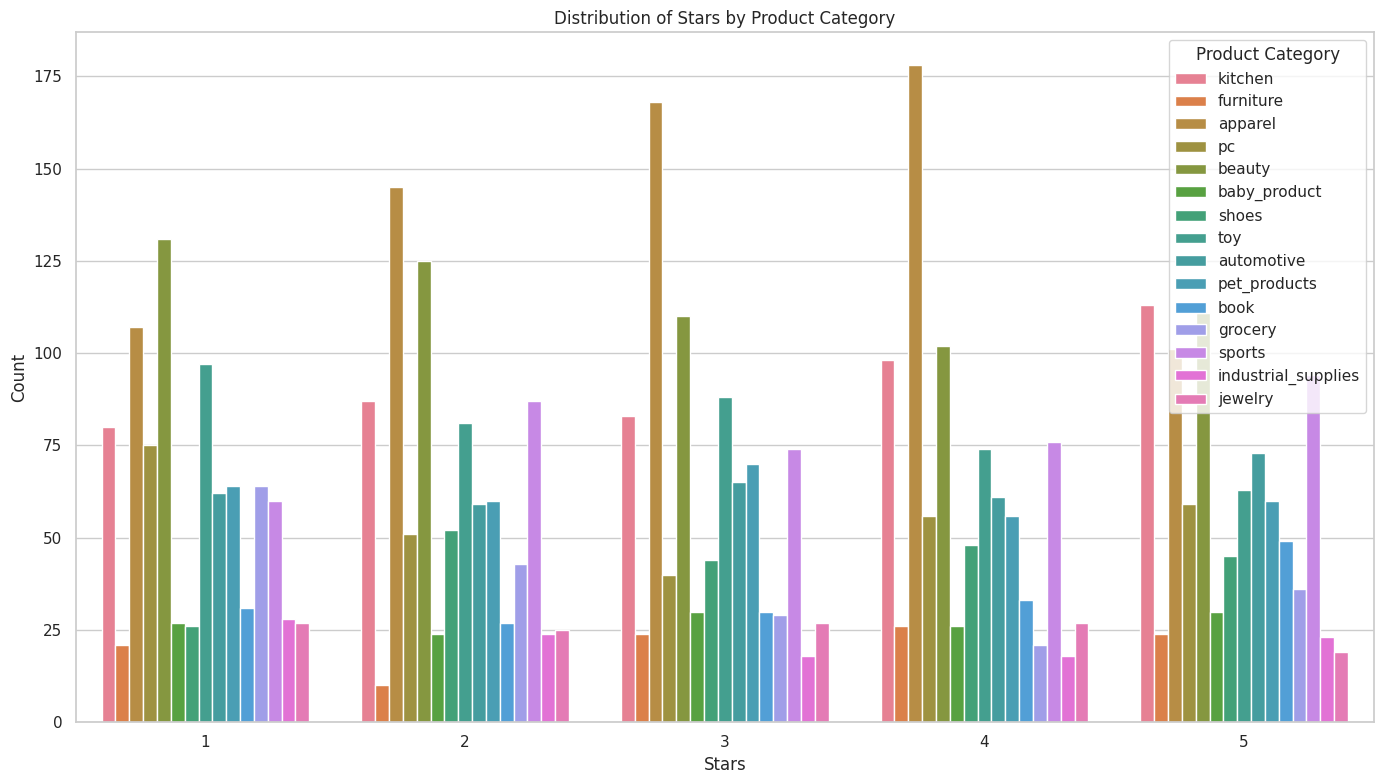

In [19]:
# Plot both stars and product_category distribution together
def plot_stars_product_category_distribution(dataframe):
    plt.figure(figsize=(14, 8))
    sns.countplot(data=dataframe, x="stars", hue="product_category", order=dataframe["stars"].value_counts().index)
    plt.title("Distribution of Stars by Product Category")
    plt.xlabel("Stars")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.legend(title="Product Category")
    plt.tight_layout()
    plt.show()
plot_stars_product_category_distribution(sampled_df)

In [20]:
# Count the number of rows
print(f"Number of rows in the train DataFrame: {len(train_df)}")
print(f"Number of rows in the test DataFrame: {len(test_df)}")

Number of rows in the train DataFrame: 2000
Number of rows in the test DataFrame: 2500


In [ ]:
# save the sampled dataframe
parquet_output_path = Path("datasets/amazon/data/amazon_train.parquet")
train_df.to_parquet(parquet_output_path, index=False)
parquet_output_path = Path("datasets/amazon/data/amazon_test.parquet")
test_df.to_parquet(parquet_output_path, index=False)